## Project 3

## <em> Classification and inference with machine learning</em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

***
### Mounting Google Drive locally
Mount your Google Drive on your runtime using an authorization code.

Note: When using the 'Mount Drive' button in the file browser, no authentication codes are necessary for notebooks that have only been edited by the current user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Imports

In [ ]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

***

#### Problem 1 - Using Keras - MNIST

The goal of this notebook is to introduce deep neural networks (DNNs) and convolutional neural networks (CNNs) using the high-level Keras package and to become familiar with how to choose its architecture, cost function, and optimizer in Keras. We will also learn how to train neural networks.

We will once again work with the MNIST dataset of hand written digits introduced in earlier HW. The goal is to find a statistical model which recognizes and distinguishes between the ten handwritten digits (0-9).

The MNIST dataset comprises handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ nuances of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic classification task.

In this Notebook, we show how to use the Keras python package to tackle the MNIST problem with the help of deep neural networks.

## Creating DNNs with Keras

Constructing a Deep Neural Network to solve ML problems is a multiple-stage process. Quite generally, one can identify the key steps as follows:

* ***step 1:*** Load and process the data
* ***step 2:*** Define the model and its architecture
* ***step 3:*** Choose the optimizer and the cost function
* ***step 4:*** Train the model
* ***step 5:*** Evaluate the model performance on the *unseen* test data
* ***step 6:*** Modify the hyperparameters to optimize performance for the specific data set

We would like to emphasize that, while it is always possible to view steps 1-5 as independent of the particular task we are trying to solve, it is only when they are put together in ***step 6*** that the real gain of using Deep Learning is revealed, compared to less sophisticated methods such as the regression models. With this remark in mind, we shall focus predominantly on steps 1-5 below. We show how one can use grid search methods to find optimal hyperparameters in ***step 6***.

### Step 1: Load and Process the Data

Keras knows to download automatically the MNIST data from the web. All we need to do is import the `mnist` module and use the `load_data()` class, and it will create the training and test data sets or us.

The MNIST set has pre-defined test and training sets, in order to facilitate the comparison of the performance of different models on the data.

Once we have loaded the data, we need to format it in the correct shape ($({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$).

The size of each sample, i.e. the number of bare features used is N_features (whis is 784 because we have a $28 \times 28$ pixel grid), while the number of potential classification categories is "num_classes" (which is 10, number of digits).

Each pixel
contains a greyscale value quantified by an integer between
0 and 255. To standardize the dataset, we normalize
the input data in the interval [0, 1].

In [ ]:
!pip3 install tensorflow
!pip3 install keras
!pip3 install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from __future__ import print_function
import keras,sklearn
# suppress tensorflow compilation warnings
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

from keras.datasets import mnist

# input image dimensions
num_classes = 10 # 10 digits

img_rows, img_cols = 28, 28 # number of pixels

# the data, shuffled and split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train[:40000]
Y_train = Y_train[:40000]

# reshape data, depending on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255


11490434/11490434 [==============================] - 0s 0us/step


<span style="color:blue"> <i> 1. Make a plot of one MNIST digit (2D plot using X data - make sure to reshape it into a $28 \times 28$ matrix) and label it (which digit does it correspond to?). </i></span> <br>

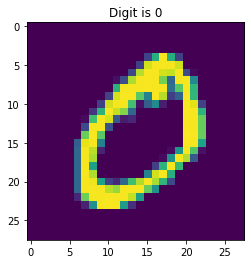

In [ ]:
plt.figure()
plt.imshow(X_train[1].reshape((28,28)))
plt.title('Digit is ' + str(Y_train[1]))
plt.show()

Last, we cast the label vectors $y$ to binary class matrices (a.k.a. one-hot format).

In [ ]:
# convert class vectors to binary class matrices

print("before conversion - ")
print("y vector : ", Y_train[0:10])

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

print("after conversion - ")
print("y vector : ", Y_train[0:10])

before conversion - 
y vector :  [5 0 4 1 9 2 1 3 1 4]
after conversion - 
y vector :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Here in this template, we use 40000 training samples and 10000 test samples. Remember that we preprocessed data into the shape $({\mathrm{N_{samples}}}, {\mathrm{N_{features}}})$.

In [ ]:
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 784)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


### Step 2: Define the Neural Net and its Architecture

We can now move on to construct our deep neural net. We shall use Keras's `Sequential()` class to instantiate a model, and will add different deep layers one by one.

Let us create an instance of Keras' `Sequential()` class, called `model`. As the name suggests, this class allows us to build DNNs layer by layer. (https://keras.io/getting-started/sequential-model-guide/)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

# instantiate model
model = Sequential()

We use the `add()` method to attach layers to our model. For the purposes of our introductory example, it suffices to focus on `Dense` layers for simplicity. (https://keras.io/layers/core/) Every `Dense()` layer accepts as its first required argument an integer which specifies the number of neurons. The type of activation function for the layer is defined using the `activation` optional argument, the input of which is the name of the activation function in `string` format. Examples include `relu`, `tanh`, `elu`, `sigmoid`, `softmax`.

In order for our DNN to work properly, we have to make sure that the numbers of input and output neurons for each layer match. Therefore, we specify the shape of the input in the first layer of the model explicitly using the optional argument `input_shape=(N_features,)`. The sequential construction of the model then allows Keras to infer the correct input/output dimensions of all hidden layers automatically. Hence, we only need to specify the size of the softmax output layer to match the number of categories.

First, add a `Dense` layer with 400 output neurons and `relu` activation function.

In [ ]:
model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))

Add another layer with 100 output neurons. Then, we will apply "dropout," a regularization scheme that has been widely adopted in the neural networks literature: during the training procedure neurons
are randomly “dropped out” of the neural network with some
probability $p$ giving rise to a thinned network. It prevents overfitting by reducing spurious correlations between neurons within the network by introducing
a randomization procedure.

In [ ]:
model.add(Dense(100, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))

Lastly, we need to add a soft-max layer since we have a multi-class output.

In [ ]:
model.add(Dense(num_classes, activation='softmax'))

### Step 3: Choose the Optimizer and the Cost Function

Next, we choose the loss function according to which to train the DNN. For classification problems, this is the cross entropy, and since the output data was cast in categorical form, we choose the `categorical_crossentropy` defined in Keras' `losses` module. Depending on the problem of interest one can pick any other suitable loss function. To optimize the weights of the net, we choose SGD. This algorithm is already available to use under Keras' `optimizers` module (https://keras.io/optimizers/), but we could use `Adam()` or any other built-in one as well. The parameters for the optimizer, such as `lr` (learning rate) or `momentum` are passed using the corresponding optional arguments of the `SGD()` function.

While the loss function and the optimizer are essential for the training procedure, to test the performance of the model one may want to look at a particular `metric` of performance. For instance, in categorical tasks one typically looks at their `accuracy`, which is defined as the percentage of correctly classified data points.

To complete the definition of our model, we use the `compile()` method, with optional arguments for the `optimizer`, `loss`, and the validation `metric` as follows:

In [ ]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])


### Step 4: Train the model

We train our DNN in minibatches. Shuffling the training data during training improves stability of the model. Thus, we train over a number of training epochs.

(The number of epochs is the number of complete passes through the training dataset, and the batch size is a number of samples propagated through the network before the model is updated.)

Training the DNN is a one-liner using the `fit()` method of the `Sequential` class. The first two required arguments are the training input and output data. As optional arguments, we specify the mini-`batch_size`, the number of training `epochs`, and the test or validation data. To monitor the training procedure for every epoch, we set `verbose=True`.

Let us set `batch_size` = 64 and `epochs` = 10.

In [ ]:
# training parameters
batch_size = 64
epochs = 10

# train DNN and store training info in history
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(X_test, Y_test))

Epoch 1/10
625/625 [==============================] - 7s 11ms/step - loss: 1.1477 - accuracy: 0.6638 - val_loss: 0.4893 - val_accuracy: 0.8880
Epoch 2/10
625/625 [==============================] - 8s 13ms/step - loss: 0.5630 - accuracy: 0.8399 - val_loss: 0.3485 - val_accuracy: 0.9100
Epoch 3/10
625/625 [==============================] - 7s 11ms/step - loss: 0.4566 - accuracy: 0.8716 - val_loss: 0.2980 - val_accuracy: 0.9191
Epoch 4/10
625/625 [==============================] - 7s 12ms/step - loss: 0.3976 - accuracy: 0.8878 - val_loss: 0.2686 - val_accuracy: 0.9269
Epoch 5/10
625/625 [==============================] - 8s 12ms/step - loss: 0.3659 - accuracy: 0.8982 - val_loss: 0.2474 - val_accuracy: 0.9314
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.3342 - accuracy: 0.9052 - val_loss: 0.2304 - val_accuracy: 0.9366
Epoch 7/10
625/625 [==============================] - 4s 7ms/step - loss: 0.3099 - accuracy: 0.9123 - val_loss: 0.2156 - val_accuracy: 0.9392
E

### Step 5: Evaluate the Model Performance on the *Unseen* Test Data

Next, we evaluate the model and read of the loss on the test data, and its accuracy using the `evaluate()` method.

313/313 [==============================] - 2s 5ms/step - loss: 0.1851 - accuracy: 0.9456
Test loss: 0.18514470756053925
Test accuracy: 0.9455999732017517


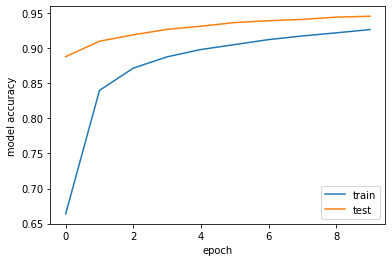

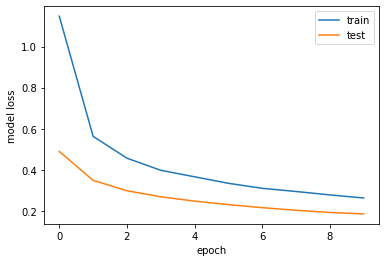

In [ ]:
# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

Last, we show how to use the grid search option of scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to optimize the
hyperparameters of our model.

First, define a function for crating a DNN:

In [ ]:
def create_DNN(optimizer=keras.optimizers.Adam()):
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

With epochs = 1 and batch_size = 64, do grid search over the following optimization schemes: ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'].

In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# define parameter dictionary
param_grid = dict(optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

625/625 [==============================] - 7s 10ms/step - loss: 0.3743 - accuracy: 0.8906


Show the mean test score of all optimization schemes and determine which scheme gives the best accuracy.

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.948300 using {'optimizer': 'Nadam'}
0.847050 (0.003889) with: {'optimizer': 'SGD'}
0.944975 (0.003210) with: {'optimizer': 'RMSprop'}
0.727675 (0.011376) with: {'optimizer': 'Adagrad'}
0.128175 (0.020529) with: {'optimizer': 'Adadelta'}
0.947100 (0.001111) with: {'optimizer': 'Adam'}
0.923450 (0.002658) with: {'optimizer': 'Adamax'}
0.948300 (0.001776) with: {'optimizer': 'Nadam'}


<span style="color:blue"> <i> 2. Create a DNN with one Dense layer having 200 output neurons. Do the grid search over any 5 different activation functions from https://keras.io/activations/. Let epochs = 1, batches = 64, p_dropout=0.5, and optimizer=keras.optimizers.Adam().  Make sure to print the mean test score of each case and determine which activation functions gives the best accuracy. </i></span> <br>


In [ ]:
def create_DNN2(activation):
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation=activation))
    model.add(Dense(100, activation=activation))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN2,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activation = ['relu', 'sigmoid', 'tanh', 'selu', 'elu']
# define parameter dictionary
param_grid = dict(activation=activation)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

625/625 [==============================] - 3s 5ms/step - loss: 0.4275 - accuracy: 0.8733
Best: 0.940025 using {'activation': 'relu'}
0.940025 (0.001684) with: {'activation': 'relu'}
0.896875 (0.002005) with: {'activation': 'sigmoid'}
0.919650 (0.002926) with: {'activation': 'tanh'}
0.908375 (0.002968) with: {'activation': 'selu'}
0.919325 (0.003490) with: {'activation': 'elu'}


<span style="color:blue"> <i> 3. Now, do the grid search over different combination of batch sizes (10, 30, 50, 100) and number of epochs (1, 2, 5). Use the activation function that gave you the highest accuracy in Part 2. Make sure to print the mean test score of each case and determine which combination of batch size and number of epochs gives the best accuracy. Here, you have a freedom to create your own DNN (assume an arbitrary number of Dense layers, optimization scheme, etc).   </i></span> <br>

Hint: To do the grid search over both batch_size and epochs, you can do:

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [ ]:
def create_DNN3():
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN3,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
batch_size = [10, 30, 50, 100]
epochs=[1,2,5]
# define parameter dictionary
param_grid = dict(batch_size=batch_size, epochs=epochs)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1000/1000 [==============================] - 2s 2ms/step - loss: 0.1919 - accuracy: 0.9434
Epoch 1/2
3000/3000 [==============================] - 11s 4ms/step - loss: 0.3672 - accuracy: 0.8902
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1316 - accuracy: 0.9608
Epoch 1/2
3000/3000 [==============================] - 17s 6ms/step - loss: 0.3667 - accuracy: 0.8907
Epoch 2/2
1000/1000 [==============================] - 5s 5ms/step - loss: 0.1355 - accuracy: 0.9597
Epoch 1/2
3000/3000 [==============================] - 16s 5ms/step - loss: 0.3588 - accuracy: 0.8947
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1295 - accuracy: 0.9599
Epoch 1/2
3000/3000 [==============================] - 13s 4ms/step - loss: 0.3607 - accuracy: 0.8932
Epoch 2/2
1000/1000 [==============================] - 2s 2ms/step - loss: 0.1410 - accuracy: 0.9576
Epoch 1/5
3000/3000 [==============================] - 12s 4ms/step - loss: 0.3681 - accuracy: 0.

<span style="color:blue"> <i> 4. Do the grid search over the number of neurons in the Dense layer and make a plot of mean test score as a function of num_neurons. Again, you have a freedom to create your own DNN. </i></span> <br>

In [ ]:
def create_DNN4(num_neurons):
    model = Sequential()
    model.add(Dense(200,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(num_neurons, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_DNN4,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
num_neurons = [50, 100, 200, 300,400]

# define parameter dictionary
param_grid = dict(num_neurons=num_neurons)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

625/625 [==============================] - 4s 6ms/step - loss: 0.3189 - accuracy: 0.9050
Best: 0.948950 using {'num_neurons': 400}
0.936350 (0.001078) with: {'num_neurons': 50}
0.940350 (0.001609) with: {'num_neurons': 100}
0.944950 (0.001484) with: {'num_neurons': 200}
0.948125 (0.001977) with: {'num_neurons': 300}
0.948950 (0.002377) with: {'num_neurons': 400}


## Creating CNNs with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. This approach neglects any spatial structure in the image. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [ ]:
# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (40000, 28, 28, 1)
Y_train shape: (40000, 10)

40000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers. Luckily, all we need to do is change the architecture of our DNN.

![alt text](https://drive.google.com/uc?id=1ZQFqg-GCRKufS4mMGcluqBquv7yCPKlX)

After we instantiate the model, add the first convolutional layer with 10 filters, which is the dimensionality of output space. (https://keras.io/layers/convolutional/) Here, we will be concerned with local spatial filters
that take as inputs a small spatial patch of the
previous layer at all depths. We consider a three-dimensional kernel of size $5\times5\times1$. Check out this visualization of the
convolution procedure for a square input of unit depth: https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
The convolution consists of running this filter over all locations
in the spatial plane. After computing the filter, the output is passed through
a non-linearity, a ReLU.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(10, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))

Subsequently, add a 2D pooling layer. (https://keras.io/layers/pooling/) This pooling layer coarse-grain spatial information by performing
a subsampling at each depth. Here, we use the the max pool operation. In a max pool, the spatial
dimensions are coarse-grained by replacing a small region
(say $2\times2$ neurons) by a single neuron whose output is the
maximum value of the output in the region.

In [ ]:
model.add(MaxPooling2D(pool_size=(2, 2)))

Add another convolutional layers with 20 filters and apply dropout. Then, add another pooling layer and flatten the data. You can do DNNs afterwards and compile the model.

In [ ]:
# add second convolutional layer with 20 filters
model.add(Conv2D(20, (5, 5), activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# add 2D pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))
# flatten data
model.add(Flatten())
# add a dense all-to-all relu layer
model.add(Dense(20*4*4, activation='relu'))
# apply dropout with rate 0.5
model.add(Dropout(0.5))
# soft-max layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])


Lastly, train your CNN and evaluate the model.

In [ ]:
# training parameters
batch_size = 64
epochs = 10


# train CNN
model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
625/625 [==============================] - 28s 44ms/step - loss: 0.3411 - accuracy: 0.8929 - val_loss: 0.1234 - val_accuracy: 0.9682
Epoch 2/10
625/625 [==============================] - 30s 47ms/step - loss: 0.1257 - accuracy: 0.9610 - val_loss: 0.0638 - val_accuracy: 0.9834
Epoch 3/10
625/625 [==============================] - 31s 49ms/step - loss: 0.0951 - accuracy: 0.9705 - val_loss: 0.0562 - val_accuracy: 0.9863
Epoch 4/10
625/625 [==============================] - 26s 42ms/step - loss: 0.0739 - accuracy: 0.9774 - val_loss: 0.0478 - val_accuracy: 0.9893
Epoch 5/10
625/625 [==============================] - 26s 42ms/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 0.0441 - val_accuracy: 0.9891
Epoch 6/10
625/625 [==============================] - 26s 41ms/step - loss: 0.0565 - accuracy: 0.9823 - val_loss: 0.0375 - val_accuracy: 0.9898
Epoch 7/10
625/625 [==============================] - 26s 41ms/step - loss: 0.0514 - accuracy: 0.9838 - val_loss: 0.0334 - val_accuracy:

<span style="color:blue"> <i> 5. Do the grid search over any 3 different optimization schemes and 2 activation functions. Suppose that we have a 2 convolutional layers with 10 neurons. Let p_dropout = 0.5, epochs = 1, and batch_size = 64. Determine which combination of optimization scheme and activation function gives the best accuracy. </i></span> <br>


In [ ]:

def create_cnn(activation,optimizer):
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation=activation,input_shape=input_shape))
    model.add(Conv2D(10, (5, 5), activation=activation))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10*4*4, activation=activation))
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])
    return model

batch_size = 64
epochs = 1
model_gridsearch = KerasClassifier(build_fn=create_cnn,
                        epochs=epochs, batch_size=batch_size, verbose=1)

# list of allowed optional arguments for the optimizer, see `compile_model()`
activation = ['relu', 'sigmoid']
optimizer = ['SGD', 'Adagrad', 'Adam']
# define parameter dictionary
param_grid = dict(activation=activation,optimizer=optimizer)

# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(X_train,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

625/625 [==============================] - 50s 80ms/step - loss: 0.2982 - accuracy: 0.9079
Best: 0.971200 using {'activation': 'relu', 'optimizer': 'Adam'}
0.910750 (0.005630) with: {'activation': 'relu', 'optimizer': 'SGD'}
0.766375 (0.025370) with: {'activation': 'relu', 'optimizer': 'Adagrad'}
0.971200 (0.000908) with: {'activation': 'relu', 'optimizer': 'Adam'}
0.111025 (0.005643) with: {'activation': 'sigmoid', 'optimizer': 'SGD'}
0.101525 (0.002934) with: {'activation': 'sigmoid', 'optimizer': 'Adagrad'}
0.894425 (0.007279) with: {'activation': 'sigmoid', 'optimizer': 'Adam'}


<span style="color:blue"> <i> 6. Create an arbitrary DNN (you are free to choose any activation function, optimization scheme, etc) and evaluate its performance. Then, add two convolutional layers and pooling layers and evaluate its performance again. How do they compare? </i></span> <br>

In [ ]:
def create_DNN():
    model = Sequential()
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

model1 = create_DNN()

batch_size = 64
epochs = 10

# train CNN
model1.fit(X_train.reshape((40000,784)), Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test.reshape((10000,784)), Y_test))

# evaliate model
score = model1.evaluate(X_test.reshape((10000,784)), Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 0.3757 - accuracy: 0.8904 - val_loss: 0.1408 - val_accuracy: 0.9584
Epoch 2/10
625/625 [==============================] - 5s 7ms/step - loss: 0.1547 - accuracy: 0.9563 - val_loss: 0.1173 - val_accuracy: 0.9630
Epoch 3/10
625/625 [==============================] - 5s 8ms/step - loss: 0.1076 - accuracy: 0.9691 - val_loss: 0.0901 - val_accuracy: 0.9742
Epoch 4/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0815 - accuracy: 0.9754 - val_loss: 0.0879 - val_accuracy: 0.9741
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0651 - accuracy: 0.9805 - val_loss: 0.0870 - val_accuracy: 0.9752
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.0816 - val_accuracy: 0.9758
Epoch 7/10
625/625 [==============================] - 5s 8ms/step - loss: 0.0411 - accuracy: 0.9875 - val_loss: 0.0885 - val_accuracy: 0.9774
Epoch 

In [ ]:
def create_cnn6b():
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu',input_shape=input_shape))
    model.add(Conv2D(10, (5, 5), activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10*4*4, activation='relu'))
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
    return model

model2 = create_cnn6b()

batch_size = 64
epochs = 10

# train CNN
model2.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

# evaluate model
score = model2.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
625/625 [==============================] - 51s 80ms/step - loss: 0.2875 - accuracy: 0.9117 - val_loss: 0.1064 - val_accuracy: 0.9761
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1079 - accuracy: 0.9677 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 3/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0827 - accuracy: 0.9747 - val_loss: 0.0565 - val_accuracy: 0.9838
Epoch 4/10
625/625 [==============================] - 50s 81ms/step - loss: 0.0688 - accuracy: 0.9790 - val_loss: 0.0431 - val_accuracy: 0.9878
Epoch 5/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0598 - accuracy: 0.9813 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 6/10
625/625 [==============================] - 50s 80ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0365 - val_accuracy: 0.9888
Epoch 7/10
625/625 [==============================] - 50s 81ms/step - loss: 0.0475 - accuracy: 0.9857 - val_loss: 0.0352 - val_accuracy:

**The performance of CNNs is better by 2%**

#### Problem 2 - Using Tensorflow - Ising Model

Next, we show how one can use deep neural nets to classify the states of the 2D Ising model according to their phase. This should be compared with the use of logistic-regression in earlier HW.

The Hamiltonian for the classical Ising model is given by

$$ H = -J\sum_{\langle ij\rangle}S_{i}S_j,\qquad \qquad S_j\in\{\pm 1\} $$

where the lattice site indices $i,j$ run over all nearest neighbors of a 2D square lattice, and $J$ is some arbitrary interaction energy scale. We adopt periodic boundary conditions. Onsager proved that this model undergoes a phase transition in the thermodynamic limit from an ordered ferromagnet with all spins aligned to a disordered phase at the critical temperature $T_c/J=2/\log(1+\sqrt{2})\approx 2.26$. For any finite system size, this critical point is expanded to a critical region around $T_c$.

### Step 1: Load and Process the Data

We begin by writing a `DataSet` class and two functions `read_data_sets` and `load_data` to process the 2D Ising data.

The `DataSet` class performs checks on the data shape and casts the data into the correct data type for the calculation. It contains a function method called `next_batch` which shuffles the data and returns a mini-batch of a pre-defined size. This structure is particularly useful for the training procedure in TensorFlow.

In [ ]:
# -*- coding: utf-8 -*-
from __future__ import absolute_import, division, print_function
import numpy as np
seed=12
np.random.seed(seed)
import sys, os, argparse
import tensorflow as tf
from tensorflow.python.framework import dtypes
# suppress tflow compilation warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

tf.random.set_seed(seed)


In [ ]:
class DataSet(object):

    def __init__(self,data_X,data_Y,dtype=dtypes.float32):
        """Checks data and casts it into correct data type. """

        dtype = dtypes.as_dtype(dtype).base_dtype
        if dtype not in (dtypes.uint8, dtypes.float32):
            raise TypeError('Invalid dtype %r, expected uint8 or float32' % dtype)

        assert data_X.shape[0] == data_Y.shape[0], ('data_X.shape: %s data_Y.shape: %s' % (data_X.shape, data_Y.shape))
        self.num_examples = data_X.shape[0]

        if dtype == dtypes.float32:
            data_X = data_X.astype(np.float32)
        self.data_X = data_X
        self.data_Y = data_Y

        self.epochs_completed = 0
        self.index_in_epoch = 0

    def next_batch(self, batch_size, seed=None):
        """Return the next `batch_size` examples from this data set."""

        if seed:
            np.random.seed(seed)

        start = self.index_in_epoch
        self.index_in_epoch += batch_size
        if self.index_in_epoch > self.num_examples:
            # Finished epoch
            self.epochs_completed += 1
            # Shuffle the data
            perm = np.arange(self.num_examples)
            np.random.shuffle(perm)
            self.data_X = self.data_X[perm]
            self.data_Y = self.data_Y[perm]
            # Start next epoch
            start = 0
            self.index_in_epoch = batch_size
            assert batch_size <= self.num_examples
        end = self.index_in_epoch

        return self.data_X[start:end], self.data_Y[start:end]

Now, load the Ising dataset, and splits it into three subsets: ordered, critical and disordered, depending on the temperature which sets the distribution they are drawn from. Once again, we use the ordered and disordered data to create a training and a test data set for the problem. Classifying the states in the critical region is expected to be harder and we only use this data to test the performance of our model in the end.

In [ ]:

import pickle
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import collections

L=40 # linear system size

# load data
fac = 25
file_name = "/content/drive/My Drive/P188_288/P188_288_Project3/Ising2DFM_reSample_L40_T=All.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
data = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (1D array, compressed bits)
data = data[::fac]
data = np.unpackbits(data).reshape(-1, 1600) # Decompress array and reshape for convenience
data=data.astype('int')
data[np.where(data==0)]=-1 # map 0 state to -1 (Ising variable can take values +/-1)

file_name = "/content/drive/My Drive/P188_288/P188_288_Project3/Ising2DFM_reSample_L40_T=All_labels.pkl" # this file contains 16*10000 samples taken in T=np.arange(0.25,4.0001,0.25)
labels = pickle.load(open(file_name,'rb')) # pickle reads the file and returns the Python object (here just a 1D array with the binary labels)

# divide data into ordered, critical and disordered
X_ordered=data[:int(70000/fac),:]
Y_ordered=labels[:70000][::fac]

X_critical=data[int(70000/fac):int(100000/fac),:]
Y_critical=labels[70000:100000][::fac]

X_disordered=data[int(100000/fac):,:]
Y_disordered=labels[100000:][::fac]

del data,labels

# define training and test data sets
X=np.concatenate((X_ordered,X_disordered)) #np.concatenate((X_ordered,X_critical,X_disordered))
Y=np.concatenate((Y_ordered,Y_disordered)) #np.concatenate((Y_ordered,Y_critical,Y_disordered))

del X_ordered, X_disordered, Y_ordered, Y_disordered


In [ ]:
# pick random data points from ordered and disordered states to create the training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.6)


# make data categorical
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)
Y_critical=to_categorical(Y_critical)


# create data sets
train = DataSet(X_train, Y_train, dtype=dtypes.float32)
test = DataSet(X_test, Y_test, dtype=dtypes.float32)
critical = DataSet(X_critical, Y_critical, dtype=dtypes.float32)

Datasets = collections.namedtuple('Datasets', ['train', 'test', 'critical'])
Dataset = Datasets(train=train, test=test, critical=critical)

You can load the training data in the following way: (Dataset.train.data_X, Dataset.train.data_Y).

### Steps 2+3: Define the Neural Net and its Architecture, Choose the Optimizer and the Cost Function

We can now move on to construct our deep neural net using TensorFlow.

Unique for TensorFlow is creating placeholders for the variables of the model, such as the feed-in data `X` and `Y` or the dropout probability `dropout_keepprob` (which has to be set to unity explicitly during testing). Another peculiarity is using the `with` scope to give names to the most important operators. While we do not discuss this here, TensorFlow also allows one to visualise the computational graph for the model (see package documentation on [https://www.tensorflow.org/](https://www.tensorflow.org/)).

The shape of X is only partially defined. We know that it will be a matrix, with instances along the first dimension and features along the second dimension, and we know that the number of features is going to be $28\times28$, but we don't know yet how many instances each training batch will contain. So the shape of X is (None, n_inputs). Similarly, we know that Y will be a vector with one entry per instance, but again we don't know the size of the training batch, so the shape is (None).

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

L=40 # system linear size
n_feats=L**2 # 40x40 square lattice
n_categories=2 # 2 Ising phases: ordered and disordered

n_hidden1 = 300
n_hidden2 = 100
n_outputs = 2

with tf.name_scope('data'):
    X=tf.placeholder(tf.float32, shape=(None,n_feats))
    Y=tf.placeholder(tf.float32, shape=(None,n_categories))
    dropout_keepprob=tf.placeholder(tf.float32)


Instructions for updating:
non-resource variables are not supported in the long term


To classify whether a given spin configuration is in the ordered or disordered phase, we construct a minimalistic model for a DNN with a single hidden layer containing $N_\mathrm{neurons}$ (which is kept variable so we can try out the performance of different sizes for the hidden layer).

Let us use a neuron_layer() function to create layers in the neural nets.

1. First, create a name scope using the name of the layer.
2. Get the number of inputs by looking up the input matrix's shape and getting the size of the second dimension.
3. Create a $W$ variable which holds the weight matrix (i.e. kernel).  Initialize it randomly, using a truncated normal distribution.
4. Create a $b$ variable for biases, initialized to 0.
5. Create a subgraph to compute $Z=XW+b$
6. Use activation function if provided.

In [ ]:
def neuron_layer(X, n_neuron, name, activation = None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs + n_neuron)
        init = tf.truncated_normal((n_inputs, n_neuron), stddev = stddev)
        W = tf.Variable(init, name = "kernel")
        b = tf.Variable(tf.zeros([n_neuron]), name = "bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

Using a neuron_layer() function, create two hidden layers and an output layer. The first hidden layer takes X as its input, and the second takes the output of the first hidden layer as its input. Finally, the output layer takes the output of the second hidden layer as its input.


In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs)

Then, define the cost function that we will use to train the neural net model. Here, use the cross entropy to penalize models that estimate a low probability for the target class.

In [ ]:
with tf.name_scope('loss'):
    xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
    loss = tf.reduce_mean(xentropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Then, define a GradientDescentOptimizer that will tweak the model parameters to minimize the cost function. Now, set learning_rate = 1e-6.

In [ ]:
learning_rate = 1e-6
with tf.name_scope('optimiser'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)


Lastly, specify how to evaluate the model. Let us simply use accuracy as our performance measure.

In [ ]:

with tf.name_scope('accuracy'):
    correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
    correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
#     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
    accuracy = tf.reduce_mean(correct_prediction)


### Steps 4+5: Train the Model and Evaluate its Performance

We train our DNN using mini-batches of size $100$ over a total of $100$ epochs, which we define first. We then set up the optimizer parameter dictionary `opt_params`, and use it to create a DNN model.

Running TensorFlow requires opening up a `Session` which we abbreviate as `sess` for short. All operations are performed in this session by calling the `run` method. First, we initialize the global variables in TensorFlow's computational graph by running the `global_variables_initializer`. To train the DNN, we loop over the number of epochs. In each fix epoch, we use the `next_batch` function of the `DataSet` class we defined above to create a mini-batch. The forward and backward passes through the weights are performed by running the `loss` and `optimizer` methods. To pass the mini-batch as well as any other external parameters, we use the `feed_dict` dictionary. Similarly, we evaluate the model performance, by getting `accuracy` on the same minibatch data. Note that the dropout probability for testing is set to unity.

Once we have exhausted all training epochs, we test the final performance on the entire training, test and critical data sets. This is done in the same way as above.

Last, we return the loss and accuracy for each of the training, test and critical data sets.

In [ ]:
training_epochs=100
batch_size=100

with tf.Session() as sess:

    # initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer())

    # train the DNN
    for epoch in range(training_epochs):

        batch_X, batch_Y = Dataset.train.next_batch(batch_size)

        sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


    # test DNN performance on entire train test and critical data sets
    train_loss, train_accuracy = sess.run([loss, accuracy],
                                                feed_dict={X: Dataset.train.data_X,
                                                           Y: Dataset.train.data_Y,
                                                           dropout_keepprob: 0.5}
                                                            )
    print("train loss/accuracy:", train_loss, train_accuracy)

    test_loss, test_accuracy = sess.run([loss, accuracy],
                                                feed_dict={X: Dataset.test.data_X,
                                                           Y: Dataset.test.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )

    print("test loss/accuracy:", test_loss, test_accuracy)

    critical_loss, critical_accuracy = sess.run([loss, accuracy],
                                                feed_dict={X: Dataset.critical.data_X,
                                                           Y: Dataset.critical.data_Y,
                                                           dropout_keepprob: 1.0}
                                                           )
    print("crtitical loss/accuracy:", critical_loss, critical_accuracy)



train loss/accuracy: 0.9951643 0.5605769230769231
test loss/accuracy: 1.0421257 0.5375
crtitical loss/accuracy: 0.80687237 0.6633333333333333


### Step 6: Modify the Hyperparameters to Optimize Performance of the Model

To study the dependence of our DNN on some of the hyperparameters, we do a grid search over the number of neurons (initially set as 100) in the hidden layer, and different SGD learning rates (initially set as 1e-6). These searches are best done over logarithmically-spaced points.

To do this, define a function for creating a DNN model: `create_DNN` and for evaluating the performance: `evaluate_model`.

The function `grid_search` will output 2D heat map to show how accuracy changes with learning rate and number of neurons.

In [ ]:
def create_DNN(n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = tf.nn.relu)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = tf.nn.relu)
        logits = tf.layers.dense(hidden2, n_outputs)

    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)

    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)

    return X, Y, dropout_keepprob, loss, optimizer, accuracy


In [ ]:
def evaluate_model(neurons,lr):

    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(n_hidden1=neurons, n_hidden2=neurons, learning_rate=lr)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs):

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.train.data_X,
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [ ]:
def grid_search():
    """This function performs a grid search over a set of different learning rates
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    N_neurons=[100, 200, 300, 400, 500]
    learning_rates=np.logspace(-6,-1,6)

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(N_neurons),len(learning_rates)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, neurons in enumerate(N_neurons):
        for j, lr in enumerate(learning_rates):

            print("training DNN with %4d neurons and SGD lr=%0.6f." %(neurons,lr) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model(neurons,lr)

    %matplotlib inline
    plot_data(learning_rates,N_neurons,train_accuracy, "training data")
    plot_data(learning_rates,N_neurons,test_accuracy, "test data")
    plot_data(learning_rates,N_neurons,critical_accuracy, "critical data")

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt

def plot_data(x,y,data, title):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    fig.colorbar(cax)

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)

    ax.set_title(title,fontsize=fontsize)

    plt.tight_layout()

    plt.show()

training DNN with  100 neurons and SGD lr=0.000001.
train loss/accuracy: 0.7889589 0.5288461538461539
test loss/accuracy: 0.78987485 0.5240384615384616
crtitical loss/accuracy: 0.80683875 0.5108333333333334
training DNN with  100 neurons and SGD lr=0.000010.
train loss/accuracy: 0.83958536 0.47884615384615387
test loss/accuracy: 0.8108387 0.4846153846153846
crtitical loss/accuracy: 0.920095 0.4125
training DNN with  100 neurons and SGD lr=0.000100.
train loss/accuracy: 0.812208 0.5051282051282051
test loss/accuracy: 0.78100127 0.5288461538461539
crtitical loss/accuracy: 0.7667287 0.54
training DNN with  100 neurons and SGD lr=0.001000.
train loss/accuracy: 0.63969207 0.6330128205128205
test loss/accuracy: 0.65271086 0.6201923076923077
crtitical loss/accuracy: 0.68993616 0.5841666666666666
training DNN with  100 neurons and SGD lr=0.010000.
train loss/accuracy: 0.21946928 0.9746794871794872
test loss/accuracy: 0.26625764 0.9326923076923077
crtitical loss/accuracy: 0.47174296 0.78
traini

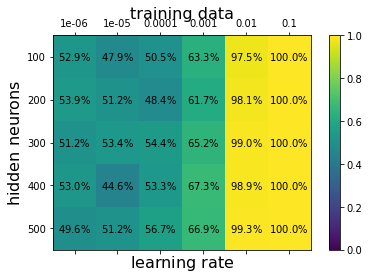

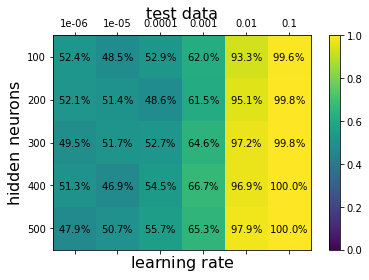

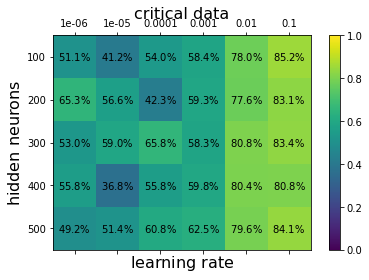

In [ ]:
grid_search()

<span style="color:blue"> <i> 1. Do the grid search over 5 different types of activation functions (https://www.tensorflow.org/api_guides/python/nn#Activation_Functions). Evaluate the performance for each case and determine which gives the best accuracy. You can assume an arbitrary DNN. Show results for training, test, and critical data. </i></span> <br>

In [ ]:
def create_DNN(activation,n_hidden1=100, n_hidden2=100, learning_rate=1e-6):
    with tf.name_scope('data'):
        X=tf.placeholder(tf.float32, shape=(None,n_feats))
        Y=tf.placeholder(tf.float32, shape=(None,n_categories))
        dropout_keepprob=tf.placeholder(tf.float32)

    with tf.name_scope("dnn"):
        hidden1 = tf.layers.dense(X, n_hidden1, activation = activation)
        hidden2 = tf.layers.dense(hidden1, n_hidden2, activation = activation)
        logits = tf.layers.dense(hidden2, n_outputs)

    with tf.name_scope('loss'):
        xentropy = tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits)
        loss = tf.reduce_mean(xentropy)

    with tf.name_scope('optimiser'):
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

    with tf.name_scope('accuracy'):
        correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(logits, 1))
        correct_prediction = tf.cast(correct_prediction, tf.float64) # change data type
    #     correct_prediction = tf.nn.in_top_k(logits, Y, 1)
        accuracy = tf.reduce_mean(correct_prediction)

    return X, Y, dropout_keepprob, loss, optimizer, accuracy

def evaluate_model1(activation):

    training_epochs=100
    batch_size=100


    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(activation)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs):

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.train.data_X,
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

In [ ]:
def grid_search1():
    """This function performs a grid search over a set of different learning rates
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    activation=[tf.nn.relu, tf.nn.tanh, tf.nn.sigmoid, tf.nn.selu, tf.nn.elu]

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros(len( activation),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i in range(len(activation)):
            print("training DNN with" + str(activation[i]))
            train_loss[i],train_accuracy[i],\
            test_loss[i],test_accuracy[i],\
            critical_loss[i],critical_accuracy[i] = evaluate_model1(activation[i])

grid_search1()

training DNN with<function relu at 0x7f9ed3f2aca0>
train loss/accuracy: 1.0830772 0.4512820512820513
test loss/accuracy: 1.0678523 0.46490384615384617
crtitical loss/accuracy: 1.1996521 0.3466666666666667
training DNN with<function tanh at 0x7f9ed43bbd30>
train loss/accuracy: 0.8202704 0.4932692307692308
test loss/accuracy: 0.83589137 0.5004807692307692
crtitical loss/accuracy: 0.830053 0.505
training DNN with<function sigmoid at 0x7f9ed3e62940>
train loss/accuracy: 0.8083038 0.5467948717948717
test loss/accuracy: 0.8348266 0.5259615384615385
crtitical loss/accuracy: 0.6636552 0.6666666666666666
training DNN with<function selu at 0x7f9ed3f2e5e0>
train loss/accuracy: 1.2066594 0.4894230769230769
test loss/accuracy: 1.1954958 0.48990384615384613
crtitical loss/accuracy: 1.2977589 0.4575
training DNN with<function elu at 0x7f9ed3f63e50>
train loss/accuracy: 0.89357966 0.47275641025641024
test loss/accuracy: 0.8966039 0.4774038461538462
crtitical loss/accuracy: 0.9286921 0.455


**Elu seems to give the highest test accuracy acuracy**

<span style="color:blue"> <i> 2. Do the grid search over 5 different numbers of epochs and batch sizes. Make a 2D heat map as shown in the example. You can assume an arbitrary DNN. Show results for training, test, and critical data.  </i></span> <br>

training DNN with   10 batch size and epochs=10.000000
train loss/accuracy: 1.2767203 0.4580128205128205
test loss/accuracy: 1.251779 0.47836538461538464
crtitical loss/accuracy: 1.4344997 0.4025
training DNN with   10 batch size and epochs=50.000000
train loss/accuracy: 0.9253842 0.5391025641025641
test loss/accuracy: 0.9799387 0.5057692307692307
crtitical loss/accuracy: 0.8775708 0.5491666666666667
training DNN with   10 batch size and epochs=100.000000
train loss/accuracy: 0.96610355 0.46826923076923077
test loss/accuracy: 0.9626632 0.4855769230769231
crtitical loss/accuracy: 1.0426875 0.4425
training DNN with   10 batch size and epochs=500.000000
train loss/accuracy: 1.2382183 0.48846153846153845
test loss/accuracy: 1.1754115 0.51875
crtitical loss/accuracy: 1.2848694 0.44166666666666665
training DNN with   10 batch size and epochs=1000.000000
train loss/accuracy: 0.9771785 0.4708333333333333
test loss/accuracy: 0.9976391 0.4716346153846154
crtitical loss/accuracy: 0.96765566 0.473

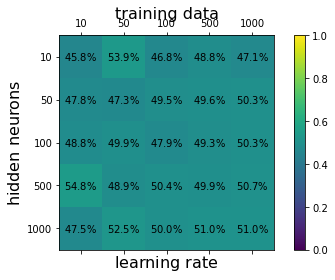

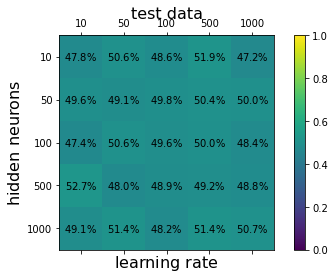

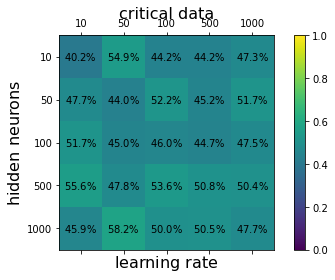

In [ ]:
def evaluate_model2(batch_size,training_epochs,activation=tf.nn.elu):



    X, Y, dropout_keepprob, loss, optimizer, accuracy = create_DNN(activation)
    with tf.Session() as sess:

        # initialize the necessary variables, in this case, w and b
        sess.run(tf.global_variables_initializer())

        # train the DNN
        for epoch in range(training_epochs):

            batch_X, batch_Y = Dataset.train.next_batch(batch_size)

            sess.run(optimizer, feed_dict={X: batch_X,Y: batch_Y,dropout_keepprob: 0.5})


        # test DNN performance on entire train test and critical data sets
        train_loss, train_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.train.data_X,
                                                               Y: Dataset.train.data_Y,
                                                               dropout_keepprob: 0.5}
                                                                )
        print("train loss/accuracy:", train_loss, train_accuracy)

        test_loss, test_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.test.data_X,
                                                               Y: Dataset.test.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )

        print("test loss/accuracy:", test_loss, test_accuracy)

        critical_loss, critical_accuracy = sess.run([loss, accuracy],
                                                    feed_dict={X: Dataset.critical.data_X,
                                                               Y: Dataset.critical.data_Y,
                                                               dropout_keepprob: 1.0}
                                                               )
        print("crtitical loss/accuracy:", critical_loss, critical_accuracy)

    return train_loss,train_accuracy,test_loss,test_accuracy,critical_loss,critical_accuracy

def grid_search2():
    """This function performs a grid search over a set of different learning rates
    and a number of hidden layer neurons."""

    # perform grid search over learnign rate and number of hidden neurons
    batch_size = [10, 50, 100,500,1000]
    epochs=[10,50,100,500,1000]

    # pre-alocate variables to store accuracy and loss data
    train_loss=np.zeros((len(batch_size),len(epochs)),dtype=np.float64)
    train_accuracy=np.zeros_like(train_loss)
    test_loss=np.zeros_like(train_loss)
    test_accuracy=np.zeros_like(train_loss)
    critical_loss=np.zeros_like(train_loss)
    critical_accuracy=np.zeros_like(train_loss)

    # do grid search
    for i, batch in enumerate(batch_size):
        for j, epoch in enumerate(epochs):

            print("training DNN with %4d batch size and epochs=%f" %(batch,epoch) )

            train_loss[i,j],train_accuracy[i,j],\
            test_loss[i,j],test_accuracy[i,j],\
            critical_loss[i,j],critical_accuracy[i,j] = evaluate_model2(batch,epoch)

    %matplotlib inline
    plot_data(epochs,batch_size,train_accuracy, "training data")
    plot_data(epochs,batch_size,test_accuracy, "test data")
    plot_data(epochs,batch_size,critical_accuracy, "critical data")

grid_search2()

#### Problem 3 - SDSS galaxies

The data is provided in the file <b>"specz_data.txt"</b>. The columns of the file (length of 13) correspond to - <br>
spectroscopic redshift ('zspec'), RA, DEC, magnitudes in 5 bands - u, g, r, i, z (denoted as 'mu,' 'mg,' 'mr,' 'mi,' 'mz' respectively); Exponential and de Vaucouleurs model magnitude fits ('logExp' and 'logDev' http://www.sdss.org/dr12/algorithms/magnitudes/); zebra fit ('pz_zebra); Neural Network fit ('pz_NN') and its error estimate ('pz_NN_Err') <br>

We will undertake 2 exercises  -
- Regression
    - We will use the magnitude of object in different bands ('mu, mg, mr, mi, mz') and do a regression exercise to estimate the redshift of the object. Hence our feature space is 5.
    - The correct redshift is given by 'zspec', which is the spectroscopic redshift of the object. We will use this for training and testing purpose.
    
    Sidenote: Photometry vs. Spectroscopy
    
    <i>&nbsp; &nbsp; The amount of energy we receive from celestial objects – in the form of radiation – is called the flux, and an astro- nomical technique of measuring the flux is photometry. Flux is usually measured over broad wavelength bands, and with the estimate of the distance to an object, it can infer the object’s luminosity, temperature, size, etc. Usually light is passed through colored filters, and we measure the intensity of the filtered light.
    
    &nbsp; &nbsp; On the other hand, spectroscopy deals with the spectrum of the emitted light. This tells us what the object is made of, how it is moving, the pressure of the material in it, etc. Note that for faint objects making photometric observation is much easier.
    
    &nbsp; &nbsp; Photometric redshift (photoz) is an estimate of the distance to the object using photometry. Spectroscopic redshift observes the object’s spectral lines and measures their shifts due to the Doppler effect to infer the distance.</i>
    

- Classification
    - We will use the same magnitudes and now also the redshift of the object  ('zspec') to classify the object as either Elleptical or Spiral. Hence our feature space is now 6.
    - The correct class is given by compring 'logExp' and 'logDev' which are the fits for Exponential and Devocular profiles. If logExp > logDev, its a spiral and vice-versa. We will use this for training and testing purpose. Since the classes are not explicitly given, generate a column for those (Classes can be $\pm 1$. If it is $0$, it does not belong to either of the class.)


##### Cleaning

Read in the files to create the data (X and Y) for both regression and classification. <br>
You will have to clean the data -
- Drop the entries that are nan or infinite
- Drop the unrealistic numbers such as 999, -999; and magnitudes that are unrealistic. Since these are absolute magnitudes, they should be positive and high. Lets choose a magnitude limit of 15 as safe bet.
- For classification, drop the entries that do not belong to either of the class


In [ ]:
#Read in and create data

fname = '/content/drive/My Drive/P188_288/P188_288_Project3/specz_data.txt'
spec_dat=np.genfromtxt(fname,names=True)
print(spec_dat.dtype.fields.keys())
#convenience variable
zspec = spec_dat['zspec']
pzNN = spec_dat['pz_NN']
#some N redshifts are not defined
pzNN[pzNN < 0] = np.nan

#For Regression
bands = ['u', 'g', 'r','i', 'z' ]
mlim = 15

xdata = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
bad = (xdata[:, 0] < mlim) | (xdata[:, 1] < mlim) | (xdata[:, 2] < mlim) & (xdata[:, 3] < mlim) | (xdata[:, 4] < mlim)
xdata = xdata[~bad]
xdata[xdata<0] = 0
ydata = zspec[~bad]

#For classification
classes = np.sign(spec_dat['logExp'] - spec_dat['logDev'])
tmp = np.concatenate([[spec_dat['m%s'%i] for i in bands]]).T
xxdata = np.concatenate([tmp, zspec.reshape(-1, 1)], axis=1)
bad = (classes==0) | (xxdata[:, 0] < mlim) | (xxdata[:, 1] < mlim) | (xxdata[:, 2] < mlim) & (xxdata[:, 3] < mlim) | (xxdata[:, 4] < mlim)
xxdata = xxdata[~bad]
classes = classes[~bad]

dict_keys(['zspec', 'RA', 'DEC', 'mu', 'mg', 'mr', 'mi', 'mz', 'logExp', 'logDev', 'pz_zebra', 'pz_NN', 'pz_NN_Err'])


For regression, X and Y data (called "xdata" and "ydata," respectively) is cleaned magnitudes (5 feature space) and spectroscopic redshifts respectively.
For classification, X and Y data (called "xxdata" and "classes" respectively) is cleaned magnitudes+spectroscopic redshifts respectively (6 feature space) and classees respectively.

In [ ]:
print('For Regression:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xdata.shape[0])
print('')
print('For Classification:')
print('Before: Size of datasets is ', zspec.shape[0])
print('After: Size of datasets is ', xxdata.shape[0])


For Regression:
Before: Size of datasets is  5338
After: Size of datasets is  4535

For Classification:
Before: Size of datasets is  5338
After: Size of datasets is  4147


# Visualization

The next step should be to visualize the data. <br>
For regression
- Make a histogram for the distribution of the data (spectroscopic redshift).
- Make 5 2D histograms of the distribution of the magnitude as function of redshift (Hint: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.axes.Axes.hist2d.html)

For classification <br>
- Make 6 1-d histogram for the distribution of the data (6 features - zspec and 5 magnitudes) for both class 1 and -1 separately

<span style="color:blue"> <i> 1. Make histograms for both regression and classification. </i></span> <br>

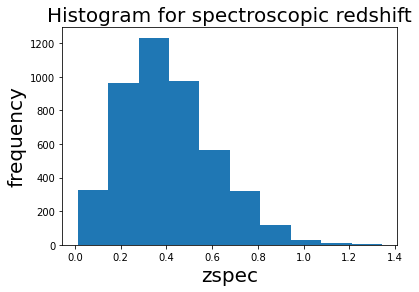

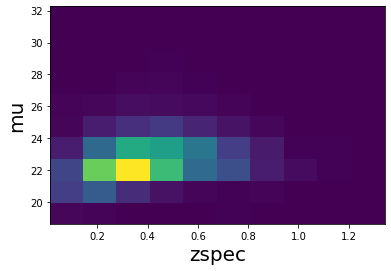

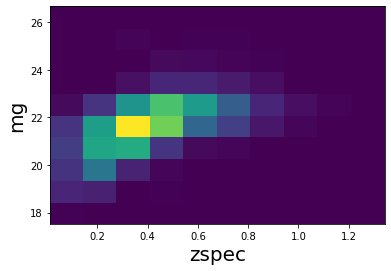

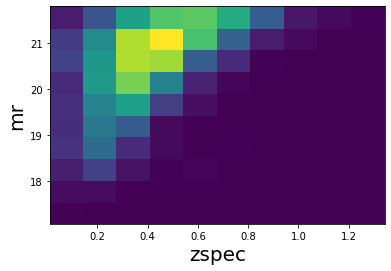

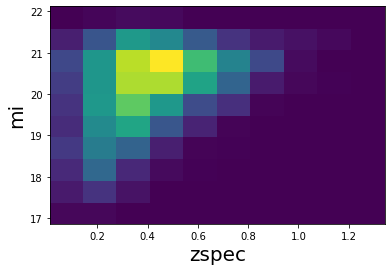

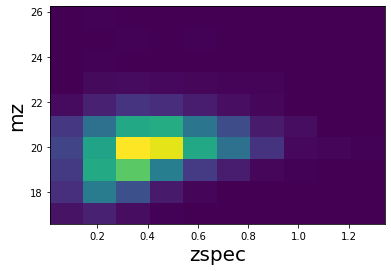

In [ ]:
## Regression histograms
plt.figure()
plt.hist(ydata)
plt.xlabel('zspec',fontsize=20)
plt.ylabel('frequency',fontsize=20)
plt.title('Histogram for spectroscopic redshift',fontsize=20)
plt.show()

for i in range(5):
  plt.figure()
  plt.hist2d(ydata,xdata[:,i])
  plt.xlabel('zspec',fontsize=20)
  plt.ylabel(list(spec_dat.dtype.fields.keys())[i+3],fontsize=20)
  plt.show()


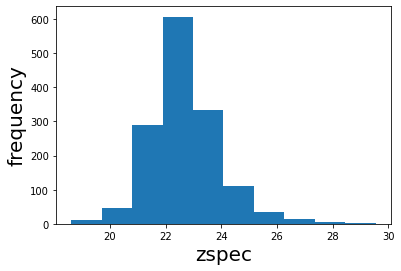

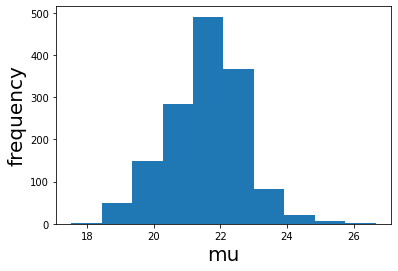

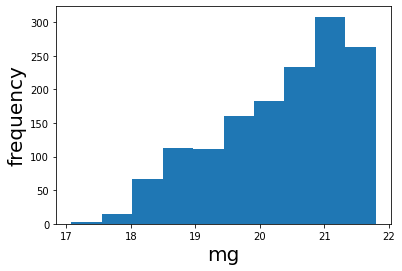

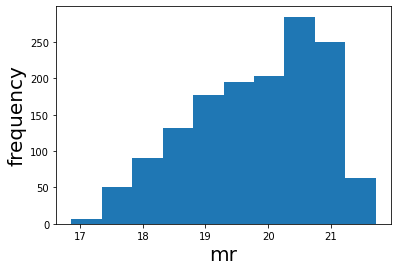

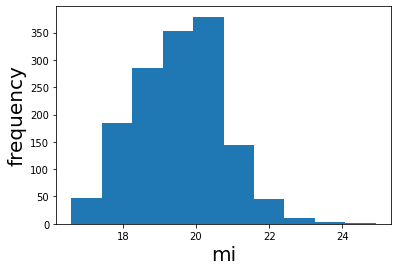

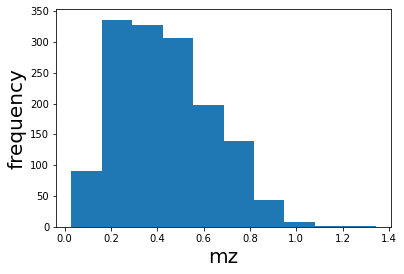

In [ ]:
## Classification for Class = +1

for i in range(6):
  plt.figure()
  plt.hist(xxdata[np.argwhere(classes==+1.0),i])
  if i==0:
    plt.xlabel('zspec',fontsize=20)
  else:
    plt.xlabel(list(spec_dat.dtype.fields.keys())[i+2],fontsize=20)
  plt.ylabel('frequency',fontsize=20)
  plt.show()

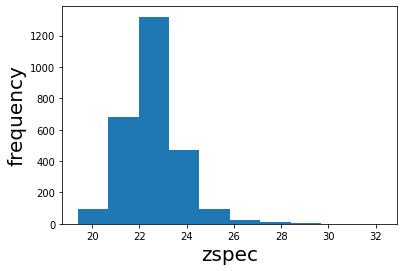

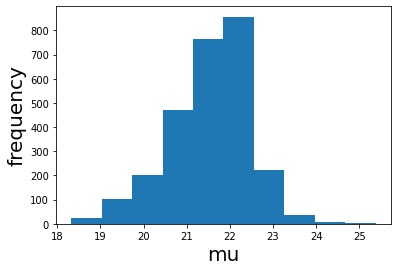

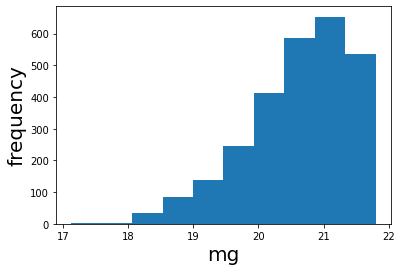

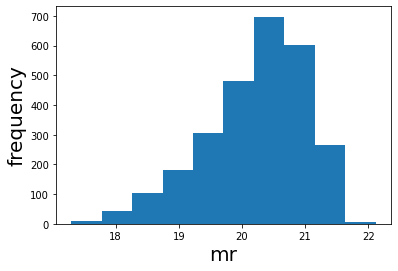

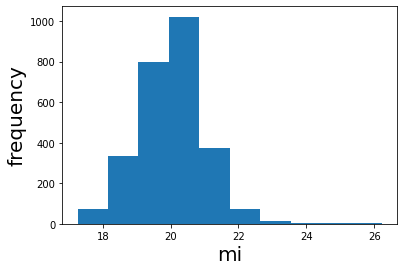

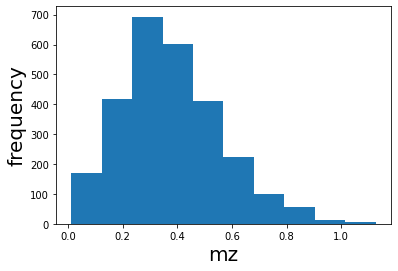

In [ ]:
## Classification for Class = -1

for i in range(6):
  plt.figure()
  plt.hist(xxdata[np.argwhere(classes==-1.0),i])
  if i==0:
    plt.xlabel('zspec',fontsize=20)
  else:
    plt.xlabel(list(spec_dat.dtype.fields.keys())[i+2],fontsize=20)
  plt.ylabel('frequency',fontsize=20)
  plt.show()

<span style="color:blue"> <i> 2. Do the following preprocessing: </i></span> <br>

#####  Preprocessing:

- Next, split the sample into training data and the testing data. We will be using the training data to train different algorithms and then compare the performance over the testing data. In this project, keep 80% data as training data and uses the remaining 20% data for testing.  <br>
- Often, the data can be ordered in a specific manner, hence shuffle the data prior to splitting it into training and testing samples. <br>
- Many algorithms are also not scale invariant, and hence scale the data (different features to a uniform scale). All this comes under preprocessing the data.
http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing <br>
Use StandardScaler from sklearn (or write your own routine) to center the data to 0 mean and 1 variance. Note that you only center the training data and then use its mean and variance to scale the testing data before using it. <br><br>

Hint: How to get a scaled training data: <br>

1. Let the training data be: train = ("training X data", "training Y data")<br>
2. You can first define a StandardScaler: <br>
scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()<br>
3. Then, do the fit: <br>
for regression: scale_xdata.fit(train_regression[0]), scale_ydata.fit(train_regression[1].reshape(-1, 1))<br>
for classication: scale_xdata.fit(train_classification[0])<br>
  Here, no need to fit for y data for classification (it's either +1 or -1. Already scaled)<br>
4. Next, transform: <br>
 for regression: scaled_train_data = (scale_xdata.fit_transform(train_regression[0]), scale_ydata.fit_transform(train_regression[1].reshape(-1, 1)))<br>
 for classication: scaled_train_data = (scale_xdata.fit_transform(train_classification[0]), train_classification[1])<br>
 Again, y data is already scaled for classification.  <br>


Do this for test data as well.


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Scaling for regression

X_train, X_test, Y_train, Y_test = train_test_split(xdata, ydata, test_size=0.2, random_state=42)

scale_xdata, scale_ydata = preprocessing.StandardScaler(), preprocessing.StandardScaler()

scale_xdata.fit(X_train)
scale_ydata.fit(Y_train.reshape(-1, 1))

x_train = scale_xdata.fit_transform(X_train)
y_train = scale_ydata.fit_transform(Y_train.reshape(-1, 1))

x_test = scale_xdata.fit_transform(X_test)
y_test = scale_ydata.fit_transform(Y_test.reshape(-1, 1))


In [ ]:
## Scaling for classification

XX_train, XX_test, yy_train,yy_test = train_test_split(xxdata, classes, test_size=0.2, random_state=42)

scale_xxdata = preprocessing.StandardScaler()

scale_xxdata.fit(XX_train)

xx_train = scale_xxdata.fit_transform(XX_train)
xx_test = scale_xxdata.fit_transform(XX_test)

##### Metrics

The last remaining preperatory step is to write metric for gauging the performance of the algorithm. Write a function to calculate the 'RMS' error given (y_predict, y_truth) to gauge regression and another function to evaluate accuracy of classification. <br>
In addition, for classification, we will also use confusion matrix.

Below is an example you can use. Feel free to write you own.

In [ ]:
from sklearn.metrics import confusion_matrix

def rms(x, y, scale1=None, scale2=None):
    '''Calculate the rms error given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    if scale1 is not None:
        x= scale1.inverse_transform(x)
    if scale2 is not None:
        y = scale2.inverse_transform(y)
    return  np.sqrt(np.mean((x[mask] - y[mask]) ** 2))

def acc(x, y):
    '''Calculate the accuracy given the truth and the prediction
    '''
    mask = np.isfinite(x[:]) & np.isfinite(y[:])
    return  (x == y).sum()/x.size


#### Hyperparameter method

Now, we will be varying hyperparameters to get the best model and build some intuition. There are various ways to do this and we will use Grid Search methodology (as you did in Problem 1 and 2) which simply tries all the combinations along with some cross-validation scheme. For most part, we will use 4-fold cross validation. <br>
Sklearn provides GridSearchCV functionality for this purpose. <br>

Its recommended to spend some time to go through output format of GridSearchCV and write some utility functions to make the recurring plots for every parameter. <br>
Grid Search returns a dictionary with self explanatory keys for the most part. Mostly, the keys correspond to (masked) numpy arrays of size = #(all possible combination of parameters). The value of individual parameter in every combination is given in arrays with keys starting from 'param_\*' and this should help you to match the combination with the corresponding scores. <br>
For masked arrays, you can access the data values by using \*.data
<br>
<br>
*Do not overwrite these grid search-ed variables (and not only their result) since we will compare all the models together in the end*

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

<span style="color:red"><i> You can choose to do only one of the two classifiers: kNN or Random Forests.</i></span> <br>
<span style="color:red"><i> If you choose to do Method 2 (Random Forests), take a look at hints from Method 1 (kNN). </i></span> <br>

### <span style="color:red"> Option (1) </span>
### Method 1. k Nearest Neighbors

For regression, let us play with grid search using knn to tune hyperparmeters. (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) Consider the following 3 hyperparameters -
- Number of neighbors ([2, 3, 5, 10, 15, 20, 25, 50, 100])
- Weights of leaves (Uniform or Inverse Distance weighing)
- Distance metric (Eucledian or Manhattan distance - parameter 'p')

<span style="color:blue"> <i> 1. Do a grid search on these parameters. List the combination of hyperparameters you tried and evaluate the accuracy (mean test score) and its standard deviation. Which gives the highest accuracy value? </i></span> <br>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

Hint: (Read the documentations carefully for more detail.)

First, define the hyperparameters: parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}

Specify the algorithm you want to use: e.g. knnr = KNeighborsRegressor()

Then, Do a grid search on these parameters using 4 fold cross validation: gcknn = GridSearchCV(knnr, parameters, cv=4)

Do the fit: gcknn.fit(*scaled_training_data)

(Let "scaled_training_data" be the training data where "scaled_training_data = ("train X data", "train Y data")"

Get results: $results = gcknn.cv_results_$

$cv_results_$ has the following dictionaries: "rank_test_score," "mean_test_score," "std_test_score," and "params" (See http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

Then, you can evaluate the models based on "rank_test_score" and print out their "params," along with their "mean_test_score" and "std_test_score".

In [ ]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}
knnr = KNeighborsRegressor()
gcknn = GridSearchCV(knnr, parameters, cv=4)
gcknn.fit(x_train,y_train)

results_reg = gcknn.cv_results_


In [ ]:
rank = results_reg['rank_test_score']
mean_score = results_reg['mean_test_score']
std_test_score = results_reg['std_test_score']
params = results_reg['params']

arg_sort = np.argsort(rank)
print('params' + ', ' + 'rank_test_score' + ', ' + 'mean_test_score' + ', ' + 'std_score' )
for i in range(len(rank)):
  print(str(params[arg_sort[i]]) + ', ' +  str(rank[arg_sort[i]])  + ', ' +  str(mean_score[arg_sort[i]])  + ', ' +  str(std_test_score[arg_sort[i]])  )

params, rank_test_score, mean_test_score, std_score
{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}, 1, 0.5702815795755888, 0.009048848590236044
{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}, 2, 0.5692697642287321, 0.0038523512380821134
{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}, 3, 0.5691558827227483, 0.009130666881806464
{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}, 4, 0.5678555483962211, 0.010809285037877923
{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}, 5, 0.5678264510251403, 0.010625174663159523
{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}, 6, 0.5668558616421244, 0.012222683007450658
{'n_neighbors': 25, 'p': 2, 'weights': 'distance'}, 7, 0.5658560270364352, 0.010804617130252846
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}, 8, 0.560550447831262, 0.006000706085083093
{'n_neighbors': 50, 'p': 1, 'weights': 'distance'}, 9, 0.5558831403790465, 0.012115127490786849
{'n_neighbors': 50, 'p': 2, 'weights': 'distance'}, 10, 0.5532605903640877, 0.011200

<span style="color:blue"> <i> 2. Also print out fitting and scoring times for all hyperparameter combinations. </i></span> <br>

*Plot timings for fitting and scoring*

Hint: Assume that you got results from: $results = gcknn.cv_results_$

Then, get the scoring time: results['mean_score_time']

and the fitting time: results['mean_fit_time']

In [ ]:
score_time = results_reg['mean_score_time']
fit_time = results_reg['mean_fit_time']

print('params' + ', ' + 'fitting time' + ', ' + 'scoring time')
for i in range(len(rank)):
  print(str(params[arg_sort[i]]) + ', ' +  str(fit_time[arg_sort[i]])  + ', ' +  str(score_time[arg_sort[i]]))

params, fitting time, scoring time
{'n_neighbors': 15, 'p': 2, 'weights': 'distance'}, 0.0024694204330444336, 0.009471237659454346
{'n_neighbors': 10, 'p': 2, 'weights': 'distance'}, 0.002248108386993408, 0.0074874162673950195
{'n_neighbors': 20, 'p': 2, 'weights': 'distance'}, 0.0021972060203552246, 0.010623455047607422
{'n_neighbors': 20, 'p': 1, 'weights': 'distance'}, 0.002230525016784668, 0.01531529426574707
{'n_neighbors': 15, 'p': 1, 'weights': 'distance'}, 0.002424955368041992, 0.014224708080291748
{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}, 0.002236008644104004, 0.016107916831970215
{'n_neighbors': 25, 'p': 2, 'weights': 'distance'}, 0.0025517940521240234, 0.013530731201171875
{'n_neighbors': 10, 'p': 1, 'weights': 'distance'}, 0.0022531747817993164, 0.012003779411315918
{'n_neighbors': 50, 'p': 1, 'weights': 'distance'}, 0.0021814703941345215, 0.022414803504943848
{'n_neighbors': 50, 'p': 2, 'weights': 'distance'}, 0.0023773908615112305, 0.01833820343017578
{'n_neighb

<span style="color:blue"> <i> 3. Based on the results you obtained in Part 1 and 2, answer the following questions </i></span> <br>

- Is it always better to use more neighbors?
- Is it better to weigh the leaves, if yes, which distnace metric performs better?
- GridCV returns fitting and scoring time for every combination. You will find that scoring time is higher than training time. Why do you think is that the case?

##### Answer:
1. No it is not always better to use more neighbors.
2. Yes weighing leaves gives better results. manhattan distance seems to perform better.



<span style="color:blue"> <i> 4. Which parameters seem to affect the performance most? To better answer this question, make plots of the mean test score for each hyperparameter. </i></span> <br>

Hint:
Suppose you have two types of hyperparameters: A and B.
Let A = [1, 2] and B = [1, 2, 4, 7, 10].

Then, you have 20 different combination of hyperparameters.

Let A = 1. Then, you can try (A,B) = (1,1), (1,2), (1,4), (1,7), (1,10)
Suppose that the mean score you got for the above combination is [0.7, 0.72, 0.75, 0.77, 0.8].
Similarly, for A = 2, you tried (A,B) = (2,1), (2,2), (2,4), (2,7), (2,10) and obtaind the mean score of [0.8, 0.82, 0.85, 0.87, 0.9].

To better see how changing the value of paramter A affects the performance, you can make the following plot:

This is the plot of the mean test score for A marginalizing over B.

Similarly, make a plot of the mean test score for each kNN hyperparameter.

In [ ]:
n_neighbors = [2, 3, 5, 10, 15, 20, 25, 50, 100]
weights= ['uniform', 'distance']
p = [1, 2]

neigh_mean= np.zeros((9,4))
w_mean = np.zeros((2,18))
p_mean = np.zeros((2,18))



for i in range(len(n_neighbors)):
  parameters1 = {'n_neighbors':[n_neighbors[i]], 'weights':['uniform', 'distance'], 'p':[1, 2]}
  knnr1 = KNeighborsRegressor()
  gcknn1 = GridSearchCV(knnr, parameters1, cv=4)
  gcknn1.fit(x_train,y_train)
  results_reg1 = gcknn1.cv_results_
  neigh_mean[i] = results_reg1['mean_test_score']
  del parameters1,knnr1,gcknn1,results_reg1

for i in range(len(w_mean)):
  parameters1 = {'n_neighbors': [2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':[weights[i]], 'p':[1, 2]}
  knnr1 = KNeighborsRegressor()
  gcknn1 = GridSearchCV(knnr, parameters1, cv=4)
  gcknn1.fit(x_train,y_train)
  results_reg1 = gcknn1.cv_results_
  w_mean[i] = results_reg1['mean_test_score']
  del parameters1,knnr1,gcknn1,results_reg1

for i in range(len(p_mean)):
  parameters1 = {'n_neighbors': [2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[p[i]]}
  knnr1 = KNeighborsRegressor()
  gcknn1 = GridSearchCV(knnr, parameters1, cv=4)
  gcknn1.fit(x_train,y_train)
  results_reg1 = gcknn1.cv_results_
  p_mean[i] = results_reg1['mean_test_score']
  del parameters1,knnr1,gcknn1,results_reg1


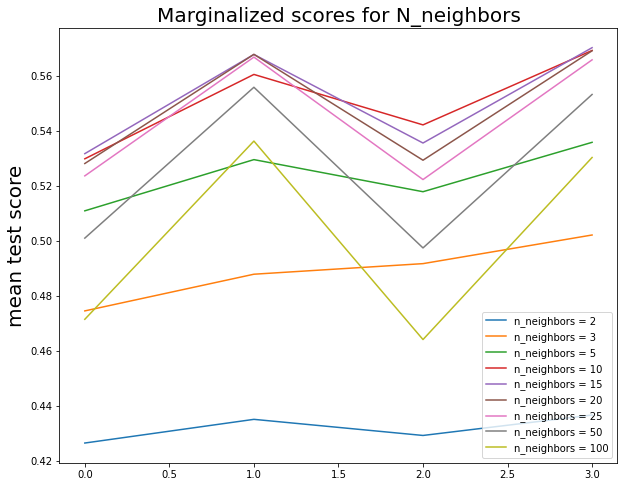

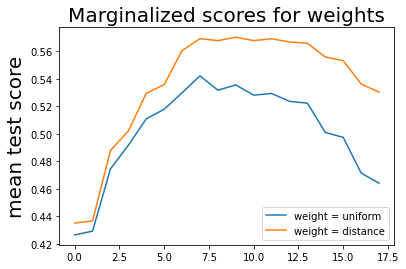

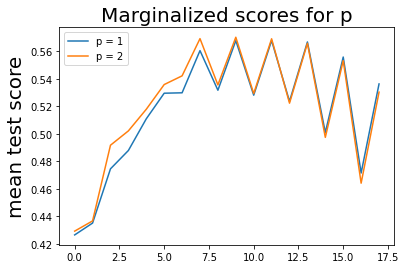

In [ ]:
plt.figure(figsize=(10,8))
for i in range(len(n_neighbors)):
  plt.plot(neigh_mean[i], label = "n_neighbors = " + str(n_neighbors[i]))
plt.ylabel("mean test score",fontsize=20)
plt.title('Marginalized scores for N_neighbors',fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
for i in range(len(weights)):
  plt.plot(w_mean[i], label = "weight = " + str(weights[i]))
plt.ylabel("mean test score",fontsize=20)
plt.title('Marginalized scores for weights',fontsize=20)
plt.legend()
plt.show()

plt.figure(figsize=(6,4))
for i in range(len(p)):
  plt.plot(p_mean[i], label = "p = " + str(p[i]))
plt.ylabel("mean test score",fontsize=20)
plt.title('Marginalized scores for p',fontsize=20)
plt.legend()
plt.show()

<span style="color:blue"> <i> 5. You have determined the best combination of hyperparameters and CV schemes. Predict the test y data using the GridSearchCV method. Use the "rms" metric function we defined earlier and calculate the rms error on the test data.  </i></span> <br>

Hint: To determine the rms error, you need:

Truth: given from data (test_data[1]) <br>
Prediction: gridsearch.predict(test_data[0])
(https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


In [ ]:
truth = y_test
prediction = gcknn.predict(x_test)

print('RMS score is')
print(rms(truth, prediction, scale1=None, scale2=None))

RMS score is
0.7055467289367265


#### Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here we will look at 4 different type of cross-validation schemes -
- Kfold
- Stratified Kfold
- Shuffle Split
- Stratified Shuffle Split

<span style="color:blue"> <i> 6. Assuming the list of hyperparameters from Part 1, do 4 different grid searches. From Part 1, take top 5 combination of hyperparameters which gives you the highest accuracy value. Rank the performance of CV schemes for each combination.  </i></span> <br>

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [ ]:
parameters = {'n_neighbors':[2, 3, 5, 10, 15, 20, 25, 50, 100], 'weights':['uniform', 'distance'], 'p':[1, 2]}
knnc = KNeighborsClassifier()

#Grid Search
gc = GridSearchCV(knnc, parameters, cv=KFold(4, random_state=100,shuffle=True))
#Do the fit
gc.fit(xx_train,yy_train)

gc2 = GridSearchCV(knnc, parameters, cv=StratifiedKFold(4, random_state = 100,shuffle=True))
#Do the fit
gc2.fit(xx_train,yy_train)

gc3 = GridSearchCV(knnc, parameters, cv=ShuffleSplit(n_splits=4, test_size=0.1, random_state = 100))
#Do the fit
gc3.fit(xx_train,yy_train)

gc4 = GridSearchCV(knnc, parameters, cv=StratifiedShuffleSplit(n_splits=4, test_size=0.1, random_state = 100))
#Do the fit
gc4.fit(xx_train,yy_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=4, random_state=100, test_size=0.1,
            train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20, 25, 50, 100],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [ ]:
print('Accuracy of Kfold')
print(acc(gc.predict(xx_test),yy_test))

print('Accuracy of Stratified Kfold')
print(acc(gc2.predict(xx_test),yy_test))

print('Accuracy of Shuffle Split')
print(acc(gc3.predict(xx_test),yy_test))

print('Accuracy of Stratified Shuffle Split')
print(acc(gc4.predict(xx_test),yy_test))

Accuracy of Kfold
0.7602409638554217
Accuracy of Stratified Kfold
0.7602409638554217
Accuracy of Shuffle Split
0.7614457831325301
Accuracy of Stratified Shuffle Split
0.7602409638554217


<span style="color:blue"> <i> 7. Answer the following questions: </i></span> <br>

- Are the conclusions different for any parameter from the regression case?
- Does the mean accuracy change for different CV scheme?
- Does the standard deviation in mean accuracy change?



**Answer: Shuffle split gives the best performance.**

<span style="color:blue"> <i> 8. Using the best combination of hyperparameters and CV schemes you have found, compute the confusion matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) and evaluate the accuracy.  </i></span> <br>

Hint: To get a confusion matrix, you need both truth (available from data) and prediction (can be computed using .predict function from GridSearchCV (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(yy_test,gc3.predict(xx_test)))

print('Accuracy of Shuffle Split')
print(acc(gc3.predict(xx_test),yy_test))

[[513  43]
 [155 119]]
Accuracy of Shuffle Split
0.7614457831325301


#### Problem 4 - Generative model

In the 3 problems above we worked on classification and regression. For those tasks we are given the labels and features of some data, and we try to predict the labels or features of the new data. This is supervised learning. Unsupervised learning is another important field in Machine Learning. In contrast to supervised learning that usually makes use of human-labeled data, unsupervised learning works with datasets with no pre-existing labels and with minimum human supervision (https://en.wikipedia.org/wiki/Unsupervised_learning). In HW 2 we have used UMAP to reduce the dimensionality of MNIST dataset, and then used HDBSCAN to do cluster analysis on the low dimension representation of MNIST. In HW 3 we used Principle Component Analysis (PCA) to model the Quasar spectrum and MNIST. In HW 4 we used Independent Component Analysis (ICA) to identify independent sources in mixed signals. These are all examples of unsupervised learning.

#### Normalizing Flow

In this problem we will train some generative models. Generative model is an important topic in unsupervised learning. It tries to learn the underlying probability density of the given data (either explicitly or implicitly) so as to generate new data. Some popular models include autoregressive models, Normalizing Flows (NF), Variational Auto-Encoders (VAE), and Generative Adverserial Networks (GAN). In HW 7 we have used a pretrained VAE to reconstruct MNIST images from incomplete and noisy data. In this problem we will focus on NFs. This exercise is based on https://arxiv.org/abs/2007.00674 .

A NF maps the data $x$ to latent variables $z$ through a sequence of invertible transformations $f = f_1 \circ f_2 \circ ... \circ f_n$, such that $z = f(x)$ and $z$ is mapped to a base distribution $\pi(z)$, which is normally chosen to be a standard Gaussian distribution. The probability density of data $x$ can be evaluated using the change of variables formula:

$$p(x) = \pi(f(x)) |\det \left(\frac{\partial f(x)}{\partial x}\right)| = \pi(f(x)) \prod_{l=1}^n |\det \left(\frac{\partial f_l(x)}{\partial x}\right)| .$$

In order to efficiently evaluate the density, the determinant of the Jacobian of each transformation $\det (\frac{\partial f_l(x)}{\partial x})$ must be easy to compute.

#### Pytorch

In HW 7 and this project we have used the Tensorflow and Keras framework. PyTorch is another machine learning framework that becomes very popular in recent years. Compared to Tensorflow, PyTorch is very similar to numpy and very pythonic, and therefore is easy to learn if you are already familiar with Python. While Tensorflow is currently the platform of choice in industry, PyTorch is more popular in the research community. In this problem we will use PyTorch to help you become familiar with this platform. Here is a great tutorial on PyTorch basics: https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html . We encourage you to read at least the first topic of the tutorial (What is PyTorch?). We will also give you some examples on PyTorch in the following questions.

We first look at a simple 1D example. Note that in 1D one has many different ways to estimate the data density, e.g., Kernel Density Estimation (KDE), Gaussian Mixture Model (GMM), histogram, etc.(https://scikit-learn.org/stable/modules/density.html). One does not have to use NF. We give you this 1D example just to show you how NF works. High dimensional problem is where NFs really outperform those methods, and we will look at high dimensional problems later.

<span style="color:blue"> <i> 1. Firstly, load in the data and make a histogram plot of the pdf of data. Set the number of bins to 50. Make sure your histogram plot is normalized.</i></span>

In [ ]:
data = np.load('/content/drive/My Drive/P188_288/P188_288_Project3/data_ThreeGaussian.npy')

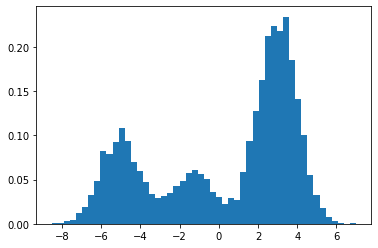

In [ ]:
plt.figure()
plt.hist(data,bins=50,density=True)
plt.show()

Now let's use NF to model the data pdf. Assuming that the true data distribution is $p(x)$, our goal is to find an invertible transformation $f$ to map the data $x$ to some latent variables $z=f(x)$ such that $z$ follows a standard Gaussian distribution. For 1D, the solution $f(x)$ is easy to find:
$$f(x)=G^{-1}(F(x)) ,$$
where $F$ is the Cumulative Distribution Function (CDF) of data distribution, and $G$ is the CDF of standard Gaussian. Then the pdf of data $p(x)$ is given by the change of variable formula
$$p(x)=N(f(x))|\frac{df(x)}{dx}| ,$$
where $N$ is the pdf of standard Gaussian.

In this problem we will approximate $f(x)$ using piecewise rational quadratic spline functions, which are monotonic, differentiable and analytically invertible. Here we provide you an example of using piecewise rational quadratic spline functions to approximate a simple function $y=x^3$, and then calculate the function derivative and invert the function.

In [ ]:
sys.path.append('./SIG_GIS/')
sys.path.append('./SINF/')
sys.path.append('./load_data/')
!git clone https://github.com/biweidai/SINF.git
from sinf.GIS import GIS
from sinf.RQspline import RQspline
import torch
import numpy as np
import matplotlib.pyplot as plt
import sys

Cloning into 'SINF'...
remote: Enumerating objects: 289, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 289 (delta 50), reused 51 (delta 50), pack-reused 231
Receiving objects: 100% (289/289), 3.45 MiB | 18.03 MiB/s, done.
Resolving deltas: 100% (185/185), done.


In [ ]:
def RQspline_interp(x, y):

    #x and y are torch 1d tensors and they must be strictly monotonic

    assert x.ndim == 1 and y.ndim == 1
    assert len(x) == len(y)

    ndim = 1
    nknot = len(x)
    spline = RQspline(ndim, nknot).requires_grad_(False)

    dy = y[1:] - y[:-1]
    dx = x[1:] - x[:-1]
    assert (dx>0).all() and (dy>0).all()

    h = dx
    s = dy / dx
    deriv = torch.zeros_like(x)
    deriv[1:-1] = (s[:-1]*h[1:] + s[1:]*h[:-1]) / (h[1:] + h[:-1])
    deriv[0] = dy[0] / dx[0]
    deriv[-1] = dy[-1] / dx[-1]

    spline.set_param(x.reshape(1,-1), y.reshape(1,-1), deriv.reshape(1,-1))
    return spline

In [ ]:
# create an array of x and y
x = np.linspace(-3, 3, 10, endpoint=True)
y = x**3

# transform x and y to PyTorch tensors
x = torch.tensor(x)
y = torch.tensor(y)

# define piecewise ratianal quadratic spline functions
spline = RQspline_interp(x, y)

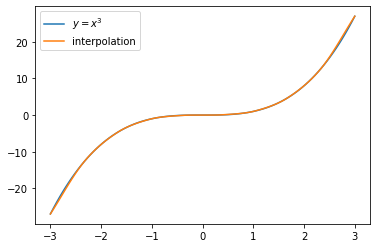

In [ ]:
#plot original function
x_plot = np.linspace(-3, 3, 100, endpoint=True)
y_plot = x_plot**3
plt.plot(x_plot, y_plot, label='$y=x^3$')

#Create PyTorch tensor x. The data type must be float (not double), and the shape must be (n, 1)
x_plot_tensor = torch.tensor(x_plot).float().reshape(-1,1)

#Call the spline function. It returns y and log(dy/dx)
y_plot_tensor, log_deriv = spline(x_plot_tensor)
plt.plot(x_plot_tensor.numpy(), y_plot_tensor.numpy(), label='interpolation')
plt.legend()
plt.show()

The derivative from interpolation

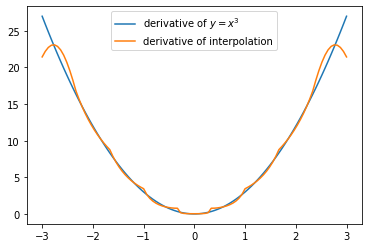

In [ ]:
#plot dy/dx
deriv = 3*x_plot**2
plt.plot(x_plot, deriv, label='derivative of $y=x^3$')

#plot dy/dx of interpolation
plt.plot(x_plot_tensor.numpy(), torch.exp(log_deriv).numpy(), label='derivative of interpolation')
plt.legend()
plt.show()

The derivatives are not accurate around the boundaries due to boundary effect.

Invert the function

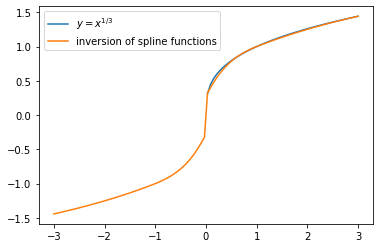

In [ ]:
# invert the original function
y_plot = x_plot**(1/3)
plt.plot(x_plot, y_plot, label='$y=x^{1/3}$')

#Invert the spline function.
y_plot_tensor = spline.inverse(x_plot_tensor)[0]
plt.plot(x_plot_tensor.numpy(), y_plot_tensor.numpy(), label='inversion of spline functions')
plt.legend()
plt.show()

<span style="color:blue"> <i> 2. Estimate the transformation $f(x)$ that transforms the data to a standard Gaussian distribution. Follow the above example, use RQspline_interp function to approximate $f(x)$. Plot $f(x)$, $\frac{df(x)}{dx}$, and $f^{-1}(x)$. Set your x to be within (-5, 5) when making the plot. </i></span>

[ 0.89826083  4.3439565   4.1346083  ... -1.2095271  -0.8376653
 -0.08557951]


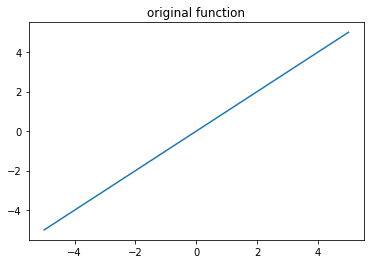

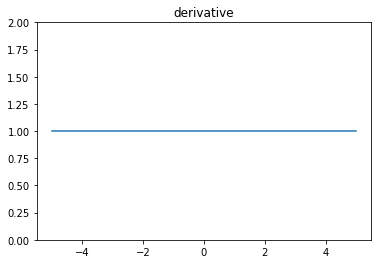

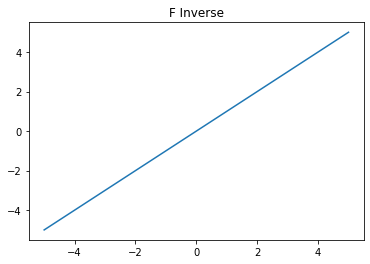

In [ ]:
import scipy
count, bins_count = np.histogram(data)

pdf = count / sum(count)


F = scipy.stats.norm.cdf(data)
f = scipy.stats.norm.ppf(F)

x = np.linspace(-5,5,100, endpoint=True)

data_sort = np.sort(data)
ind = np.argsort(data)
f_sort = np.zeros(len(f))
for i in range(len(f)):
  f_sort[i] = f[ind[i]]

xd = torch.tensor(x).float().reshape(-1,1)

splinef = RQspline_interp(torch.tensor(data_sort), torch.tensor(f_sort))
fx, logdfx = splinef(xd)

f_inv = splinef.inverse(xd)[0]
#plot original function
#
plt.figure()
plt.plot(xd.numpy(), fx.numpy() , label='$f(x)$')
plt.title('original function')
plt.show()

#plotting derivative
#
plt.figure()
plt.plot(xd.numpy(), torch.exp(logdfx).numpy(), label='$df/dx$')
plt.title('derivative')
plt.ylim(0,2)
plt.show()

#plotting inverse
#
plt.figure()
plt.plot(xd.numpy(), f_inv.numpy(), label='$f^{-1}$')
plt.title('F Inverse')
plt.show()

<span style="color:blue"> <i> 3. Calculate latent variable $z=f(x)$. Make a histogram of pdf of $z$. Does it follow a Gaussian distribution? </i></span>

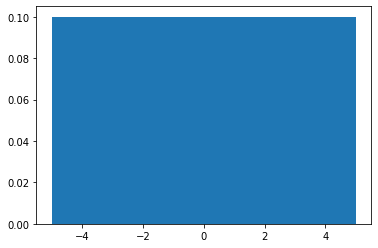

In [ ]:
plt.figure()
plt.hist(fx.numpy(),density=True)
plt.show()

**Does not follow gaussian. It follows uniform distribution**

<span style="color:blue"> <i> 4. Now let's estimate the pdf of the data using the
change of variable formula $p(x)=N(f(x))|\frac{df(x)}{dx}|$. Make a plot of $p(x)$. How does it compare with the histogram in Q1?</i></span>

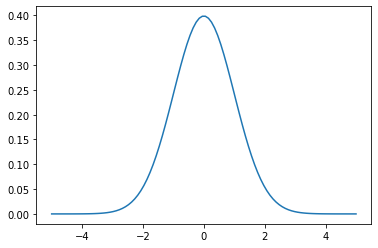

In [ ]:
px = scipy.stats.norm.pdf(fx.numpy())*np.absolute(torch.exp(logdfx).numpy())
plt.figure()
plt.plot(xd.numpy(), px, label='$p(x)$')
plt.show()

**Compared to part 1, p(x) has only one peak representing gaussian distribution**

The pdf is noisy. One could apply regularization when modeling to get a smoother pdf.

NFs allow us to sample from $p(x)$ to create new data. The idea is to firstly sample latent variable $z$ from $N(0,I)$ using torch.randn(nsample, ndim), and then transform $z$ to $x$ with inverse transform $f^{-1}$.

<span style="color:blue"> <i> 5. Sample from $p(x)$ using $x=f^{-1}(z)$. Get 10000 samples. Make a histogram of the pdf of samples. Does it agree with Q1 and Q4? </i></span>

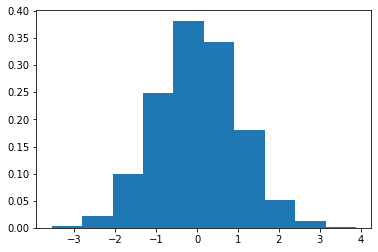

In [ ]:
z = torch.randn(10000,1)
x_tf= splinef.inverse(z)[0]
plt.figure()
plt.hist(x_tf.numpy(),density=True)
plt.show()

**part 5 agrees with Q4 but not Q1**

***